In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from astropy.stats import circvar
from astropy import units as u
import os
# from ipywidgets import interactive
print("import complete")

import complete


In [2]:
def replace_area_name(df, area_key):
# df = dataframe containing an area array column
# area_key = string

    df[area_key] = df[area_key].replace(1, 'V1')
    df[area_key] = df[area_key].replace(2, 'LM')
    df[area_key] = df[area_key].replace(3, 'LI')
    
    return df

In [3]:
mode = 'hubel'

if mode == 'nuke':
    root_path = "C:/Users/lan/Documents/repos/inter"
elif mode == 'hubel':
    root_path = 'C:/Users/ll357/Documents/inter/'
elif mode == 'linux':
    root_path = '/home/ll357@dhe.duke.edu/inter'

mode, root_path

('hubel', 'C:/Users/ll357/Documents/inter/')

## response amplitude by area

In [4]:
file_path = os.path.join(root_path, "results/CV SNR OSI R2 ori_perc by area - why HVA lack well fit", "amp_area.mat").replace("\\","/")
temp = loadmat(file_path)

df = pd.DataFrame(temp['resp_ad'], columns=['resp_ad'])
df['area_ad'] = temp['area_ad']
df['area_ad'] = df['area_ad'].replace(1, 'V1')
df['area_ad'] = df['area_ad'].replace(2, 'LM')
df['area_ad'] = df['area_ad'].replace(3, 'LI')
df.tail()

,resp_ad,area_ad
479,0.010215,LM
480,0.040586,LM
481,0.037092,LM
482,0.035262,LM
483,0.038123,LM


In [5]:
df2 = pd.DataFrame(temp['resp_tg_collapse_ori'], columns=['resp_tg_avg_ori'])
df2['area_tg'] = temp['area_tg']
df2['area_tg'] = df2['area_tg'].replace(1, 'V1')
df2['area_tg'] = df2['area_tg'].replace(2, 'LM')
df2['area_tg'] = df2['area_tg'].replace(3, 'LI')
df2.tail()

,resp_tg_avg_ori,area_tg
407,0.025418,LM
408,0.021595,LM
409,0.058434,LM
410,0.046758,LM
411,0.040096,LM


In [6]:
df.groupby('area_ad', sort=False).describe().reset_index()

area_ad resp_ad                                                              \
            count      mean       std       min       25%       50%       75%   
0      V1   267.0  0.080751  0.069315  0.011885  0.033769  0.057628  0.108478   
1      LM   141.0  0.077834  0.092100  0.010215  0.033665  0.051986  0.092534   
2      LI    76.0  0.068316  0.058048  0.012089  0.029422  0.050297  0.087156   

             
        max  
0  0.486399  
1  0.755541  
2  0.319786

In [7]:
df2.groupby('area_tg', sort=False).describe().reset_index()

area_tg resp_tg_avg_ori                                                    \
                    count      mean       std       min       25%       50%   
0      V1           239.0  0.083117  0.062466  0.009222  0.043842  0.063730   
1      LM           107.0  0.086615  0.092219  0.015696  0.037610  0.057234   
2      LI            66.0  0.078257  0.049079  0.022743  0.042143  0.064019   

                       
        75%       max  
0  0.100160  0.435435  
1  0.103541  0.644160  
2  0.099516  0.241633

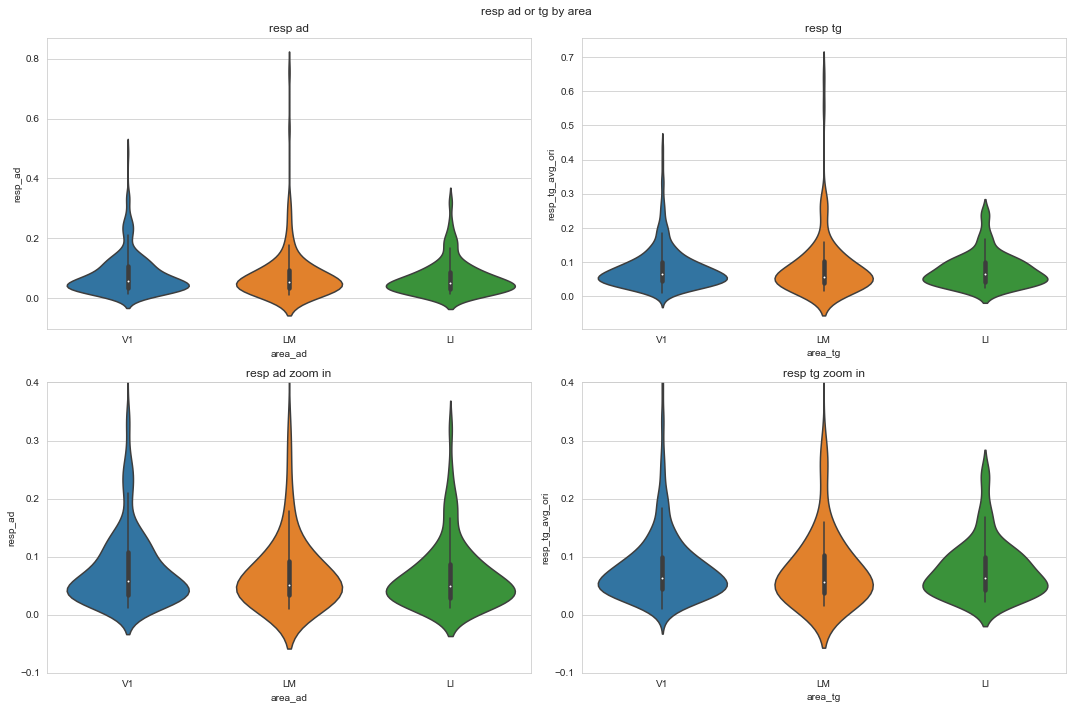

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('resp ad or tg by area')

# resp ad
ax = sns.violinplot(ax=axes[0,0], x="area_ad", y="resp_ad", data=df)
axes[0,0].set_title('resp ad')

# resp tg
ax = sns.violinplot(ax=axes[0,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
axes[0,1].set_title('resp tg')

# resp ad zoom in
ax = sns.violinplot(ax=axes[1,0], x="area_ad", y="resp_ad", data=df)
ax.set(ylim=(-0.1, 0.4))
axes[1,0].set_title('resp ad zoom in')

# resp tg zoom in
ax = sns.violinplot(ax=axes[1,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
ax.set(ylim=(-0.1, 0.4))
axes[1,1].set_title('resp tg zoom in')

fig.tight_layout()

### Polar plot of resp_ori by area

In [9]:
ncell_tg = temp['resp_tg'].shape[0]
nori = temp['resp_tg'].shape[1]
resp_tg_cell = []
resp_tg_sorted = np.zeros((ncell_tg, nori))

for icell in np.arange(ncell_tg):
    resp_tg_cell = temp['resp_tg'][icell, :]
    resp_tg_sorted[icell, :] = np.concatenate(
        (resp_tg_cell[np.argmax(resp_tg_cell):len(resp_tg_cell)], 
         resp_tg_cell[0:np.argmax(resp_tg_cell)])) # put max resp to column zero
    
df3 = pd.DataFrame(resp_tg_sorted)
df3['area'] = temp['area_tg']
df3 = replace_area_name(df3, 'area')
df3

,0,1,2,3,4,5,6,7,area
0,0.186297,0.184818,0.095037,0.053145,0.037715,0.041623,0.050704,0.185359,V1
1,0.108755,0.042337,-0.003442,0.007771,-0.021082,-0.017110,0.035048,0.096532,V1
2,0.334310,0.331804,0.054893,0.075347,0.037645,0.046042,0.088307,0.192283,V1
3,0.866983,0.851523,0.237683,0.124013,0.058653,0.050948,0.023531,0.501670,V1
4,0.094991,0.010616,0.023006,0.033687,0.009473,0.022536,0.073898,0.083687,V1
...,...,...,...,...,...,...,...,...,...
407,0.092442,0.050402,0.049153,-0.021308,-0.012517,0.032724,0.009602,0.002845,LM
408,0.059946,-0.015757,0.048349,0.010541,-0.002692,0.018728,0.034506,0.019142,LM
409,0.100901,0.012366,0.078618,0.058513,0.019648,0.067646,0.069631,0.060153,LM
410,0.091941,0.039788,0.039541,0.031566,0.082758,0.014472,0.040642,0.033356,LM


In [10]:
df3.groupby('area', sort=False).count().reset_index()

,area,0,1,2,3,4,5,6,7
0,V1,239,239,239,239,239,239,239,239
1,LM,107,107,107,107,107,107,107,107
2,LI,66,66,66,66,66,66,66,66


In [12]:
df_mean = df3.groupby('area', sort=False).mean().reset_index()
df_mean

,area,0,1,2,3,4,5,6,7
0,V1,0.189429,0.105789,0.061552,0.050540,0.043605,0.048948,0.060476,0.104599
1,LM,0.159020,0.100637,0.078627,0.058909,0.058579,0.063240,0.077658,0.096254
2,LI,0.135697,0.087246,0.066252,0.053657,0.057660,0.068695,0.070728,0.086117


In [14]:
df_median = df3.groupby('area', sort=False).median().reset_index()
df_median

,area,0,1,2,3,4,5,6,7
0,V1,0.144829,0.074164,0.049312,0.036211,0.034849,0.035739,0.044892,0.072835
1,LM,0.118889,0.068838,0.051055,0.040134,0.030842,0.039416,0.047986,0.068135
2,LI,0.106541,0.074895,0.054512,0.049813,0.041845,0.056051,0.057500,0.073321


In [16]:
df_std = df3.groupby('area', sort=False).std().reset_index()
df_std

,area,0,1,2,3,4,5,6,7
0,V1,0.137807,0.106330,0.062236,0.057600,0.046306,0.062865,0.064945,0.104128
1,LM,0.124312,0.111539,0.096953,0.080087,0.086121,0.084268,0.103900,0.105930
2,LI,0.079208,0.057271,0.051583,0.046024,0.050421,0.054776,0.061219,0.066770


In [17]:
arr_median = df_median.to_numpy()
arr_median = arr_median[0:3, 1:nori+1]
chop_idx = 4
arr_median = np.hstack((arr_median[:, chop_idx:], arr_median[:, :chop_idx])) # flip to make max resp ori at the middle
arr_median = np.concatenate((arr_median, arr_median[:,0].reshape([3,1])), axis=1)

arr_mean = df_mean.to_numpy()
arr_mean = arr_mean[0:3, 1:nori+1]
arr_mean = np.hstack((arr_mean[:, chop_idx:], arr_mean[:, :chop_idx]))
arr_mean = np.concatenate((arr_mean, arr_mean[:,0].reshape([3,1])), axis=1)

arr_std = df_std.to_numpy()
arr_std = arr_std[0:3, 1:nori+1]
arr_std = np.hstack((arr_std[:, chop_idx:], arr_std[:, :chop_idx]))
arr_std = np.concatenate((arr_std, arr_std[:,0].reshape([3,1])), axis=1)

ncell_area = df3.groupby('area', sort=False).count().reset_index()[0]
ncell_area = ncell_area.to_numpy().reshape([3,1])
arr_sem = arr_std / np.sqrt(ncell_area)

N = nori * 2
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii_V1_med = np.concatenate((arr_median[0], arr_median[0]))
radii_LM_med = np.concatenate((arr_median[1], arr_median[1]))
radii_LI_med = np.concatenate((arr_median[2], arr_median[2]))
radii_V1_mean = np.concatenate((arr_mean[0], arr_mean[0]))
radii_LM_mean = np.concatenate((arr_mean[1], arr_mean[1]))
radii_LI_mean = np.concatenate((arr_mean[2], arr_mean[2]))
width = np.pi / nori

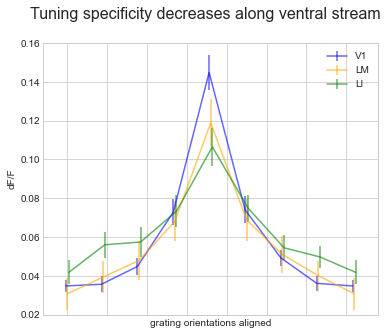

In [19]:
deg = np.linspace(0.0, 180, 8, endpoint=False)
deg = np.asarray([*deg, 180])
# deg = deg[:-1]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))

plt.errorbar(deg-1, arr_median[0], yerr=arr_sem[0], label='V1', color='blue', alpha=0.6)
plt.errorbar(deg, arr_median[1], yerr=arr_sem[1], label='LM', color='orange', alpha=0.6)
plt.errorbar(deg+1, arr_median[2], yerr=arr_sem[2], label='LI', color='green', alpha=0.6)

plt.xlim([-15,195])
plt.ylim([0.02,0.16])
plt.yticks(np.arange(0.02, 0.18, step=0.02))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('grating orientations aligned')
plt.ylabel('dF/F')

figtitle = 'Tuning specificity decreases along ventral stream'
plt.suptitle(figtitle, size=16)
plt.legend();
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# plt.savefig(root_path + 'results/poster/' + figtitle + '.pdf', format='pdf')

In [158]:
# plt.figure(figsize=(15, 10))
# ax = plt.subplot(121, projection='polar')
# ax.bar(theta, radii_V1_med, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
# ax.bar(theta, radii_LM_med, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
# ax.bar(theta, radii_LI_med, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
# plt.yticks(np.arange(0, 0.16, step=0.04))
# ax.legend(['V1 239', 'LM 107', 'LI 66'])
# plt.title('median ori resp')

# ax = plt.subplot(122, projection='polar')
# ax.bar(theta, radii_V1_mean, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
# ax.bar(theta, radii_LM_mean, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
# ax.bar(theta, radii_LI_mean, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
# plt.title('mean ori resp')
# plt.yticks(np.arange(0, 0.18, step=0.04))
# plt.show()

## circular variance
cirvar is calculated with positive values only. all negative responses are rectified to 0.  
https://stackoverflow.com/questions/52856232/scipy-circular-variance  
https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Circular_Data_Analysis.pdf  
https://docs.astropy.org/en/stable/api/astropy.stats.circvar.html

In [24]:
file_path = os.path.join(root_path, "results/CV SNR OSI R2 ori_perc by area - why HVA lack well fit", "corr_well_fit_HVA_w_cirvar.mat").replace("\\","/")
temp = loadmat(file_path)

ori_list = np.arange(0, 180, 22.5)
# temp['dfof_tg_ori'].shape

ncell = temp['dfof_tg_ori'].shape[0]
nori = 8
cirvar = np.pi * np.ones((ncell, 1))

for icell in range(0, ncell):
    pseudo = [] # pretend there is a dist of angles, to calculate circular variance
    
    for j in range(0, nori):
        pseudo.append([ori_list[j]] * int(temp['dfof_tg_ori'][icell][j])) 
        pseudo_flat = [item for sublist in pseudo for item in sublist]
        cell_data = np.asarray(pseudo_flat)*u.deg
        cirvar[icell] = float(circvar(cell_data)) # TODO: instead of rectifying negative values, try adding a constant to the data so all values are positive
        
cirvar.shape

c:\Users\ll357\Anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(539, 1)

## ori_perc correlates with?
- areacode, vis_driven, well_fit  
- ori_perc  
- OSI, R2, width, SNR

In [25]:
file_path = os.path.join(root_path, "results/CV SNR OSI R2 ori_perc by area - why HVA lack well fit", "corr_well_fit_HVA.mat").replace("\\","/")
temp = loadmat(file_path)

del temp['__header__']
del temp['__version__']
del temp['__globals__']
temp.keys()

dict_keys(['OSI', 'R2', 'SSE', 'area_merge', 'coeff_var', 'ori_perc_all', 'sharp', 'vis', 'well_fit'])

In [26]:
df = pd.DataFrame(temp['area_merge'], columns=['area'])
for key in temp.keys():
    df[key] = temp[key]

df = df.drop(columns='area_merge')
df['vis_well_fit'] = df['well_fit'] & df['vis'] # true well fit: both visually driven and well fit
df['cirvar'] = cirvar
df['area'] = df['area'].replace(1, 'V1').replace(2, 'LM').replace(3, 'LI')

df = df[['area', 'vis', 'vis_well_fit', 'ori_perc_all', 'well_fit',
    'OSI', 'cirvar', 'sharp', 
    'R2', 'SSE', 'coeff_var']]
df.describe()

,vis,vis_well_fit,ori_perc_all,well_fit,OSI,cirvar,sharp,R2,SSE,coeff_var
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.931354,0.278293,40.570721,0.302412,0.627859,0.310605,4.856182,0.653765,0.004115,5.489793
std,0.253085,0.448575,23.454350,0.459729,1.195255,0.135826,5.656417,0.275461,0.008089,84.493862
min,0.000000,0.000000,2.408343,0.000000,-17.093486,0.000000,0.346600,-0.695097,0.000059,0.373075
25%,1.000000,0.000000,17.490573,0.000000,0.313496,0.225702,0.916490,0.465905,0.001126,1.043703
50%,1.000000,0.000000,42.538263,0.000000,0.595265,0.307743,2.576697,0.721151,0.002398,1.423818
75%,1.000000,1.000000,57.937636,1.000000,0.895763,0.392258,5.893881,0.886233,0.004475,2.114635
max,1.000000,1.000000,89.977356,1.000000,11.723328,0.740979,20.000000,0.997551,0.142692,1963.122296


### Visually driven or well fit cell percentage vs area
V1 and LM are comparably driven by gratings, LI is less so.  
from V1 to LM to LI, well-fit cell number decreases.

In [27]:
df[['area','vis','well_fit','vis_well_fit']].groupby('area', sort=False).mean().reset_index()

,area,vis,well_fit,vis_well_fit
0,V1,0.945392,0.433447,0.402730
1,LM,0.931250,0.162500,0.162500
2,LI,0.883721,0.116279,0.069767


In [28]:
df[['area','vis','well_fit','vis_well_fit']].groupby('area', sort=False).std().reset_index()

,area,vis,well_fit,vis_well_fit
0,V1,0.227601,0.496399,0.491286
1,LM,0.253823,0.370067,0.370067
2,LI,0.322439,0.322439,0.256249


### OSI vs ori_perc

OSI = (dfof_pref - dfof_orth) ./ (dfof_pref + dfof_orth); should be btw 0-1 if response to grating is always positive (which is not the case)  
as ori_perc increases (less well-fit), OSI decreases. this is true for all cells & well-fit subgroup

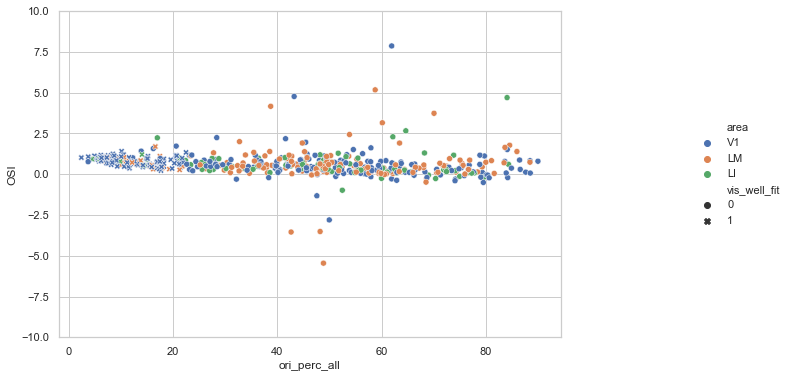

In [29]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(-10,10);

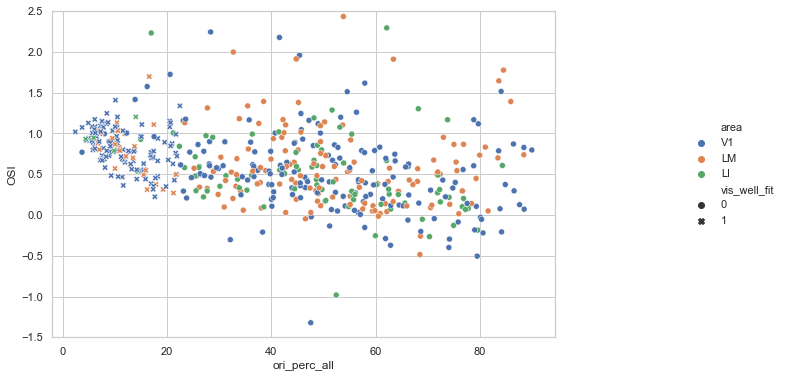

In [30]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(-1.5,2.5);

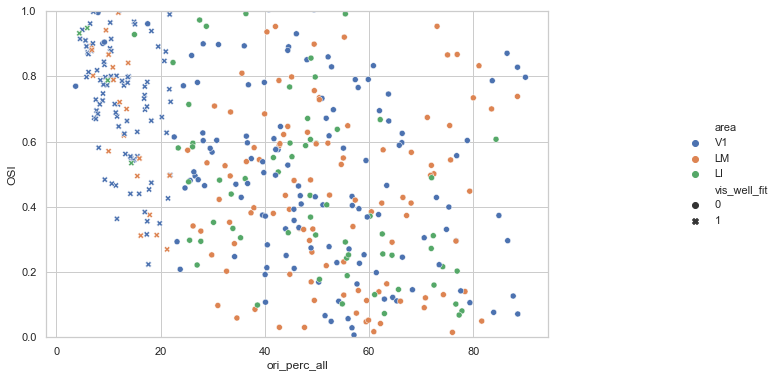

In [31]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(0,1);

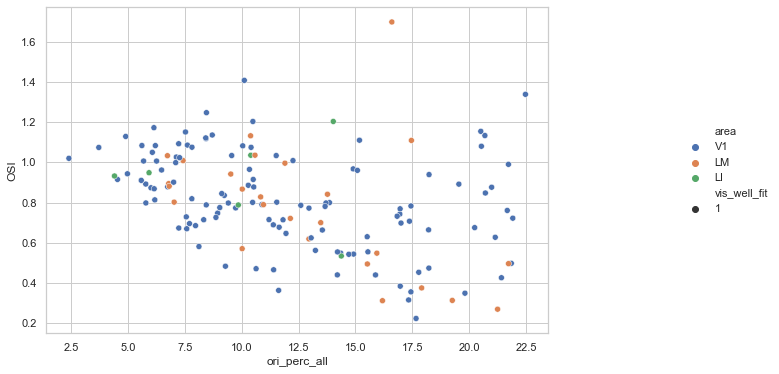

In [32]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.ylim(0,1);

### OSI vs cirvar

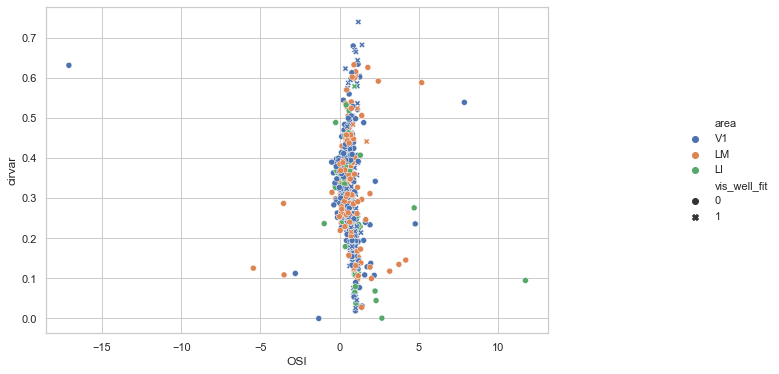

In [33]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

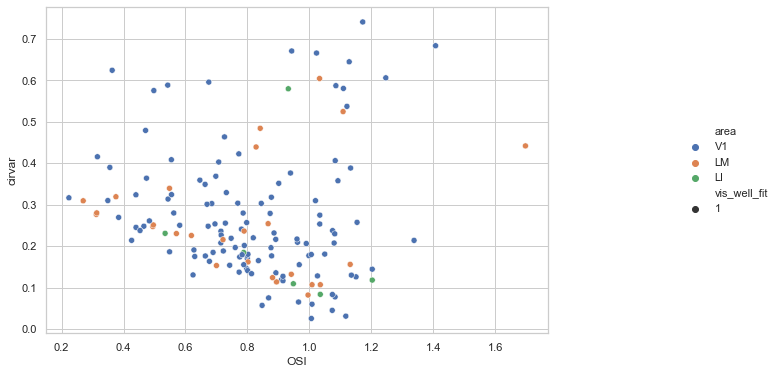

In [34]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit == 1], x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

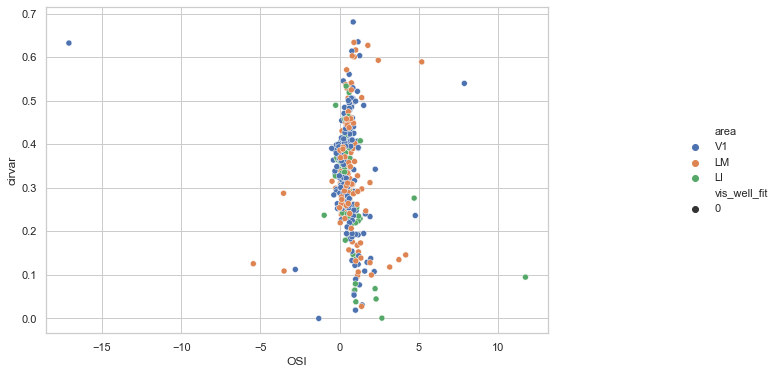

In [35]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit == 0], x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### R2 vs ori_perc
as ori_perc increases (less well-fit), R2 decreases. this is true for all cells & well-fit subgroup

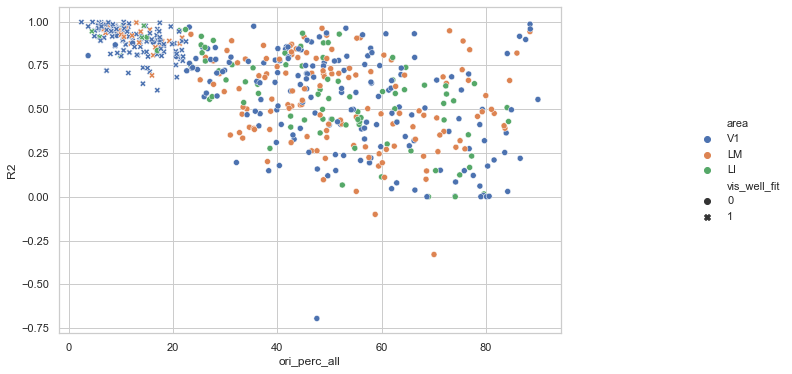

In [36]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

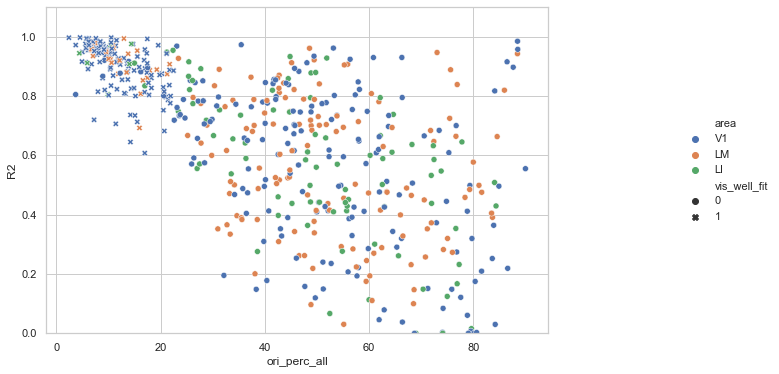

In [37]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(0,1.1);

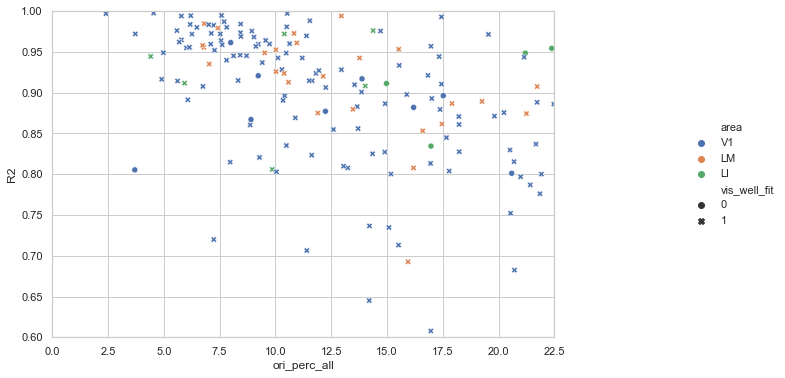

In [38]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlim(0,22.5);
plt.ylim(0.6,1);

### sharpness of tuning curve vs ori_perc
as ori_perc increases (less well-fit), sharpness decreases for well-fit subgroup.  
non-well-fit cells are fit with chaotic tuning curve.

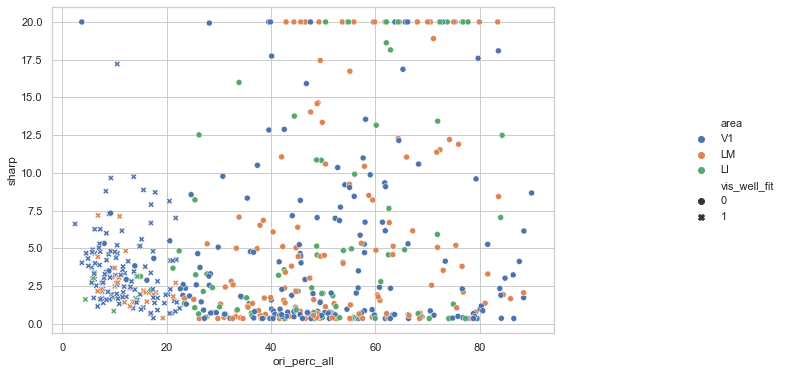

In [39]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="sharp", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
# plt.ylim(0.6,1);

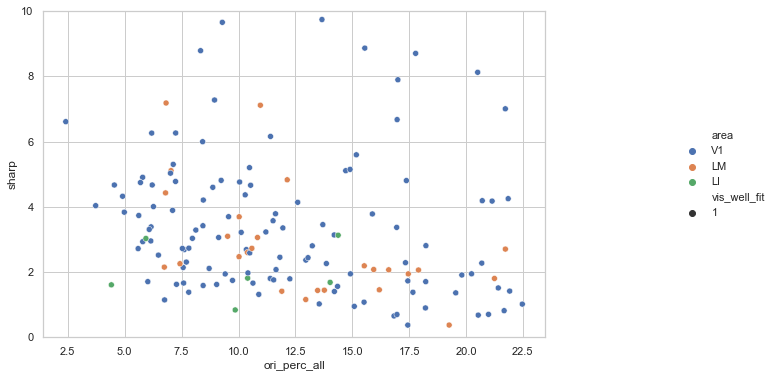

In [40]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="sharp", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
plt.ylim(0,10);

### SNR vs ori_perc
as ori_perc increases (less well-fit), coefficient of variance increases (SNR decreases). this is true for all cells & well-fit subgroup, and expected by the well fit criteria (the stability of bootstrap fits)

In [41]:
df[['area','coeff_var']].groupby('area', sort=False).median().reset_index()

,area,coeff_var
0,V1,1.370924
1,LM,1.583869
2,LI,1.439483


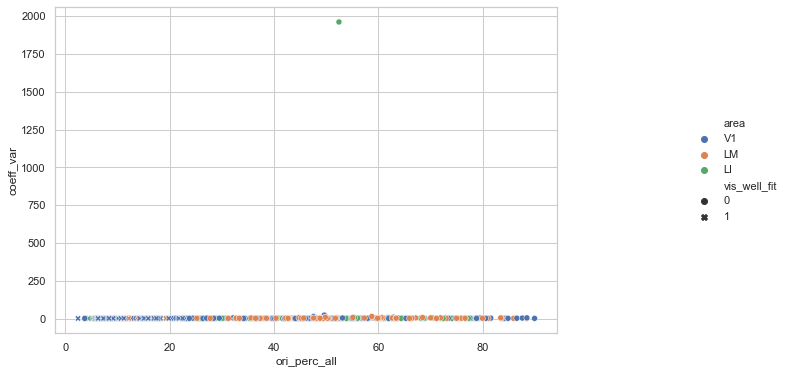

In [42]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
# plt.ylim(0.6,1);

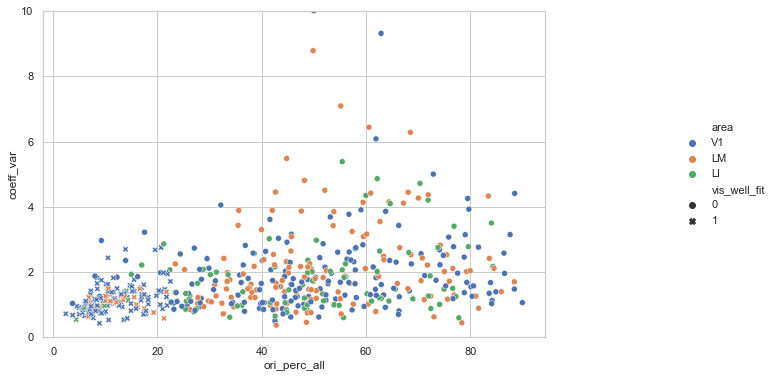

In [43]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.coeff_var<100], x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
plt.ylim(0,10);

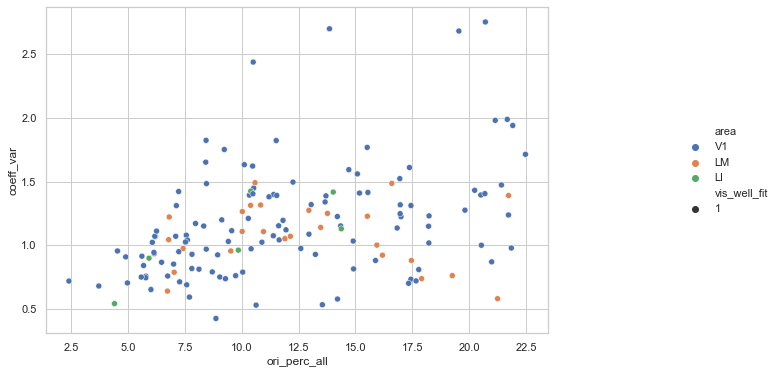

In [44]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

## corr btw ori_perc vs all

In [45]:
df['area'] = df['area'].replace('V1',1).replace('LM',2).replace('LI',3)
df_corr = df.corr(method ='pearson')
df_corr[['area', 'vis', 'vis_well_fit', 'ori_perc_all']]

,area,vis,vis_well_fit,ori_perc_all
area,1.000000,-0.080810,-0.302078,0.230669
vis,-0.080810,1.000000,0.168585,0.031716
vis_well_fit,-0.302078,0.168585,1.000000,-0.756020
ori_perc_all,0.230669,0.031716,-0.756020,1.000000
well_fit,-0.294789,-0.028927,0.943129,-0.796569
OSI,0.029047,-0.078676,0.095778,-0.152942
cirvar,-0.057084,0.288578,-0.189930,0.353272
sharp,0.118279,-0.111279,-0.165397,0.238581
R2,-0.167217,0.031158,0.561621,-0.644296
SSE,-0.105474,0.027109,-0.001424,-0.010152


In [46]:
df_corr

,area,vis,vis_well_fit,ori_perc_all,well_fit,OSI,cirvar,sharp,R2,SSE,coeff_var
area,1.000000,-0.080810,-0.302078,0.230669,-0.294789,0.029047,-0.057084,0.118279,-0.167217,-0.105474,0.080715
vis,-0.080810,1.000000,0.168585,0.031716,-0.028927,-0.078676,0.288578,-0.111279,0.031158,0.027109,-0.163824
vis_well_fit,-0.302078,0.168585,1.000000,-0.756020,0.943129,0.095778,-0.189930,-0.165397,0.561621,-0.001424,-0.031896
ori_perc_all,0.230669,0.031716,-0.756020,1.000000,-0.796569,-0.152942,0.353272,0.238581,-0.644296,-0.010152,0.027355
well_fit,-0.294789,-0.028927,0.943129,-0.796569,1.000000,0.117477,-0.271011,-0.156838,0.593172,-0.014326,-0.033222
OSI,0.029047,-0.078676,0.095778,-0.152942,0.117477,1.000000,-0.127640,-0.009227,0.203248,-0.020241,-0.057995
cirvar,-0.057084,0.288578,-0.189930,0.353272,-0.271011,-0.127640,1.000000,-0.040121,-0.056433,0.037891,-0.025076
sharp,0.118279,-0.111279,-0.165397,0.238581,-0.156838,-0.009227,-0.040121,1.000000,-0.116045,-0.109171,-0.026492
R2,-0.167217,0.031158,0.561621,-0.644296,0.593172,0.203248,-0.056433,-0.116045,1.000000,-0.087097,-0.100057
SSE,-0.105474,0.027109,-0.001424,-0.010152,-0.014326,-0.020241,0.037891,-0.109171,-0.087097,1.000000,0.009794


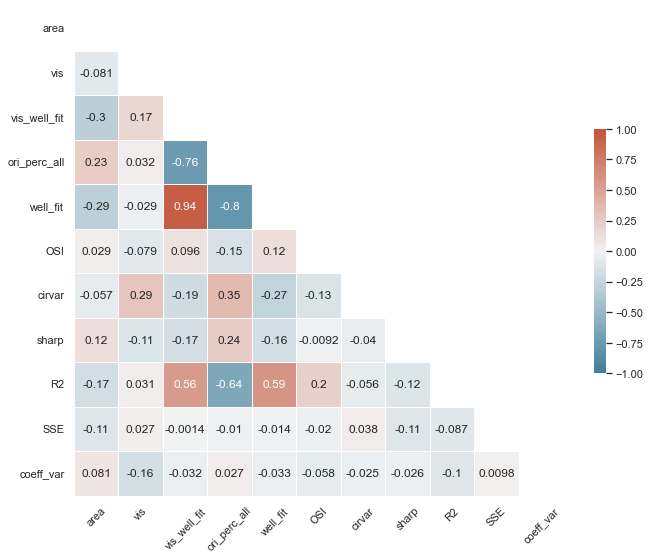

In [47]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # Generate a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45);

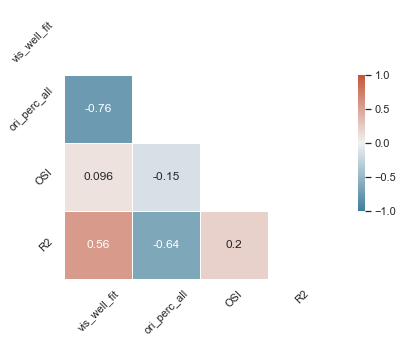

In [48]:
df2 = df[['vis_well_fit','ori_perc_all','OSI','R2']]
df_corr_only = df2.corr(method ='pearson')

sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(8,5))
mask = np.triu(np.ones_like(df_corr_only, dtype=bool)) # Generate a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap

sns.heatmap(df_corr_only, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45); plt.yticks(rotation=45);

## find combined metrics of well_fit

In [49]:
df3 = df[['area','vis','vis_well_fit','ori_perc_all','OSI','R2']]
df3.head()

,area,vis,vis_well_fit,ori_perc_all,OSI,R2
0,1,1,1,13.547029,0.663277,0.909820
1,1,1,0,48.059424,0.850999,0.912416
2,1,1,1,7.232809,1.092288,0.982684
3,1,1,1,9.414715,0.797583,0.936868
4,1,1,1,6.014102,0.873269,0.954914


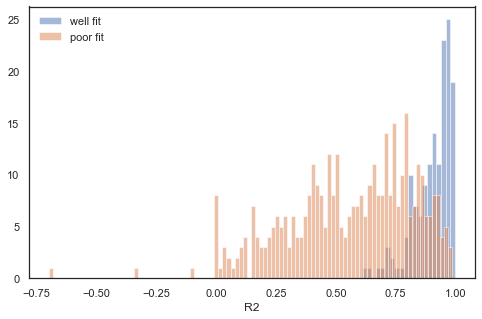

In [51]:
plt.figure(figsize=(8,5))
plt.hist(df3[df3.vis_well_fit == 1].R2, bins=20, alpha=0.5, label="well fit");
plt.hist(df3[df3.vis_well_fit == 0].R2, bins=100, alpha=0.5, label="poor fit");
plt.legend();
# plt.xlim(0.5,1);
plt.xlabel('R2');

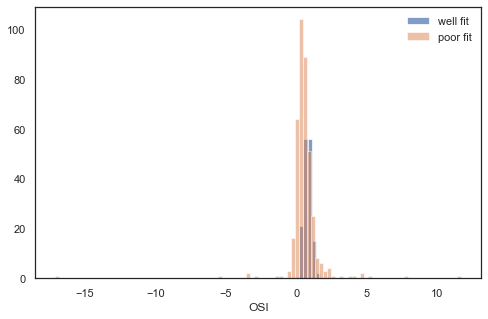

In [52]:
plt.figure(figsize=(8,5))
plt.hist(df3[df3.vis_well_fit == 1].OSI, bins=5, alpha=0.7, label="well fit");
plt.hist(df3[df3.vis_well_fit == 0].OSI, bins=100, alpha=0.5, label="poor fit");
plt.legend();
# plt.xlim(0,2);
plt.xlabel('OSI');

In [70]:
np.percentile(df3.OSI, 15), np.percentile(df3.OSI, 95), np.percentile(df3.R2, 60)

(0.15610541840730832, 1.4260015613710306, 0.7951293449039696)

In [53]:
df3['re_well_fit'] = ((df3.R2 > 0.8) & (df3.OSI > 0.2) & (df3.OSI < 1.5))
df3['re_vis_well_fit'] = ((df3.R2 > 0.8) & (df3.OSI > 0.2) & (df3.OSI < 1.5) & (df3.vis == 1))
df3.head()

C:\Users\ll357\AppData\Local\Temp\7\ipykernel_53636\2579558451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['re_well_fit'] = ((df3.R2 > 0.8) & (df3.OSI > 0.2) & (df3.OSI < 1.5))
C:\Users\ll357\AppData\Local\Temp\7\ipykernel_53636\2579558451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['re_vis_well_fit'] = ((df3.R2 > 0.8) & (df3.OSI > 0.2) & (df3.OSI < 1.5) & (df3.vis == 1))


,area,vis,vis_well_fit,ori_perc_all,OSI,R2,re_well_fit,re_vis_well_fit
0,1,1,1,13.547029,0.663277,0.909820,True,True
1,1,1,0,48.059424,0.850999,0.912416,True,True
2,1,1,1,7.232809,1.092288,0.982684,True,True
3,1,1,1,9.414715,0.797583,0.936868,True,True
4,1,1,1,6.014102,0.873269,0.954914,True,True


In [54]:
df3.corr()

,area,vis,vis_well_fit,ori_perc_all,OSI,R2,re_well_fit,re_vis_well_fit
area,1.000000,-0.080810,-0.302078,0.230669,0.029047,-0.167217,-0.200528,-0.198129
vis,-0.080810,1.000000,0.168585,0.031716,-0.078676,0.031158,0.014160,0.200315
vis_well_fit,-0.302078,0.168585,1.000000,-0.756020,0.095778,0.561621,0.679287,0.720289
ori_perc_all,0.230669,0.031716,-0.756020,1.000000,-0.152942,-0.644296,-0.619682,-0.583252
OSI,0.029047,-0.078676,0.095778,-0.152942,1.000000,0.203248,0.106521,0.091304
R2,-0.167217,0.031158,0.561621,-0.644296,0.203248,1.000000,0.719522,0.684828
re_well_fit,-0.200528,0.014160,0.679287,-0.619682,0.106521,0.719522,1.000000,0.949261
re_vis_well_fit,-0.198129,0.200315,0.720289,-0.583252,0.091304,0.684828,0.949261,1.000000


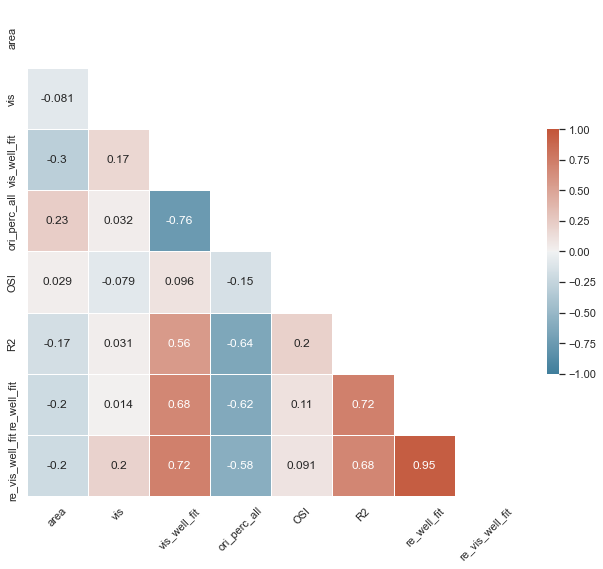

In [71]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(df3.corr(), dtype=bool)) # Generate a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap

sns.heatmap(df3.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45);

### overlap btw new vs old well fit cells

In [72]:
df4 = df3.copy()
df4 = df4.drop(columns=['re_well_fit'])
df4['agree'] = (df3.re_vis_well_fit == df3.vis_well_fit).astype(int)
df4['overlap'] = ((df3.re_vis_well_fit) & (df3.vis_well_fit)).astype(int)
df4.re_vis_well_fit = df4.re_vis_well_fit.astype(int)

In [73]:
t1 = df4[['area','re_vis_well_fit','vis_well_fit','overlap','agree']].groupby('area', sort=False).mean().reset_index().values
t2 = df4[['area','re_vis_well_fit','vis_well_fit','overlap','agree']].groupby('area', sort=False).count().reset_index().values

df4[['area','re_vis_well_fit','vis_well_fit','overlap','agree']].groupby('area', sort=False).mean().reset_index()

,area,re_vis_well_fit,vis_well_fit,overlap,agree
0,1,0.436860,0.402730,0.361775,0.883959
1,2,0.281250,0.162500,0.150000,0.856250
2,3,0.197674,0.069767,0.069767,0.872093


In [75]:
tt = (t1[:,1:] * t2[:,1:]).astype(int)
df5 = pd.DataFrame(tt)
df5.columns = ['re_vis_well_fit', 'vis_well_fit', 'overlap', 'agree']
df5['total'] = t2[:,1].astype(int)
df5.index = ['V1', 'LM', 'LI']
df5

,re_vis_well_fit,vis_well_fit,overlap,agree,total
V1,128,118,106,259,293
LM,45,26,24,137,160
LI,17,6,6,75,86


### re_well_fit tuning bias across areas
filter: vis_driven by adapter & re_well_fit

In [180]:
file_path = os.path.join(root_path, "mat", "adp_dataset_master.xlsx").replace("\\","/")
meta = pd.read_excel(file_path, index_col=None)

meta = meta[meta.seg == 'segmented']
meta = meta[meta.mouse <= 1324]
meta = meta[['mouse','date','area']]
meta.mouse = meta.mouse.astype(int)
meta.date = meta.date.astype(int)
meta

,mouse,date,area
0,1322,200803,V1
1,1322,200804,LM
2,1322,200806,LI
3,1323,200720,V1
4,1323,200721,LM
5,1323,200723,LI
6,1324,200728,V1
7,1324,200729,LM


In [181]:
nset = len(meta.index); ncell = []; nori = 8; nisi = 3; nframe_trial = 223
dir_name = root_path + 'mat/'

vis_ad = np.empty([0,1]); vis_tg = np.empty([0,1]); well_fit = np.empty([0,1])
ori_pref = np.empty([0,nisi]); fit_param = np.empty([0,7,nisi])
dfof_ad = np.empty([0,1]); dfof_tg = np.empty([0,nori,nisi])
dfof_ad_std = np.empty([0,1]); dfof_tg_std = np.empty([0,nori,nisi])
trace = np.empty([0,nori,nisi,nframe_trial])

for iset in np.arange(nset):
    dir_sub = str(meta.area[iset]) + '_i' + str(meta.mouse[iset]) + '_' + str(meta.date[iset])

    cell_prop = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'cell_property_loose' + '.mat'))
    dfof = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'dfof' + '.mat'))
    trace_align = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'trace_aligned' + '.mat'))
    fit_tuning = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'fit_tuning_isi3' + '.mat'))
    
    ncell.append(len(cell_prop['vis_cell_ad']))    
    vis_ad = np.concatenate((vis_ad, cell_prop['vis_cell_ad']), axis=0)
    vis_tg = np.concatenate((vis_tg, cell_prop['vis_cell_noad_tg']), axis=0)
    well_fit = np.concatenate((well_fit, cell_prop['well_fit_cell']), axis=0)
    
    ori_pref = np.concatenate((ori_pref, cell_prop['ori_pref']), axis=0)
    fit_param = np.concatenate((fit_param, fit_tuning['fit_param']), axis=0)

    dfof_ad = np.concatenate((dfof_ad, dfof['dfof_ad']), axis=0)
    dfof_ad_std = np.concatenate((dfof_ad_std, dfof['dfof_ad_std']), axis=0)
    dfof_tg = np.concatenate((dfof_tg, dfof['dfof_tg']), axis=0)
    dfof_tg_std = np.concatenate((dfof_tg_std, dfof['dfof_tg_std']), axis=0)
    
    trace_flat = np.empty([ncell[iset],nori,nisi,nframe_trial]);
    for icell in np.arange(ncell[iset]):
        for iori in np.arange(nori):
            for iisi in np.arange(nisi):
                trace_flat[icell][iori][iisi][:] = trace_align['trace_avg'][icell][iori][iisi].flatten()
    trace = np.vstack((trace,trace_flat))

ncell, vis_ad.shape, vis_tg.shape, well_fit.shape, ori_pref.shape, fit_param.shape, dfof_ad.shape, dfof_tg.shape, trace.shape

([97, 69, 53, 103, 39, 33, 93, 52],
 (539, 1),
 (539, 1),
 (539, 1),
 (539, 3),
 (539, 7, 3),
 (539, 1),
 (539, 8, 3),
 (539, 8, 3, 223))

In [182]:
df4.head()

,area,vis,vis_well_fit,ori_perc_all,OSI,R2,re_vis_well_fit,agree,overlap
0,1,1,1,13.547029,0.663277,0.909820,1,1,1
1,1,1,0,48.059424,0.850999,0.912416,1,0,0
2,1,1,1,7.232809,1.092288,0.982684,1,1,1
3,1,1,1,9.414715,0.797583,0.936868,1,1,1
4,1,1,1,6.014102,0.873269,0.954914,1,1,1


In [183]:
tt = ori_pref.copy()
tt[tt > 90] = np.abs(tt[tt > 90] - 180)
tuning_bias = tt[:,[1,2]] - tt[:,[0]];

ori_pref_bin = tt[:,[0]];
ori_pref_bin[ori_pref_bin < 22.5] = 0; ori_pref_bin[ori_pref_bin > 67.5] = 90; 
ori_pref_bin[(ori_pref_bin >= 22.5) & (ori_pref_bin <= 67.5)] = 45; 

In [186]:
meta['ncell'] = ncell
mouse_cell = [item for item, count in zip(meta.mouse, meta.ncell) for i in range(count)]
area_cell = [item for item, count in zip(meta.area, meta.ncell) for i in range(count)]
meta_cell = pd.DataFrame({'mouse': mouse_cell, 'area': area_cell})
meta_cell_750 = meta_cell.copy(); meta_cell_750['isi'] = 750
meta_cell_250 = meta_cell.copy(); meta_cell_250['isi'] = 250
meta_cell_isi = pd.concat([meta_cell_750, meta_cell_250], ignore_index=True)

df_adp_tune = meta_cell_isi.copy()
df_adp_tune['tuning_bias'] = tuning_bias.flatten('F')
df_adp_tune['ori_pref_bin'] = np.concatenate((ori_pref_bin, ori_pref_bin), axis=0)

df_adp_tune['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_tune['well_fit'] = np.concatenate((well_fit, well_fit), axis=0)
df_adp_tune['re_well_fit'] = np.concatenate((df4.re_vis_well_fit, df4.re_vis_well_fit), axis=0) 
df_adp_tune = df_adp_tune[ df_adp_tune['vis_ad'] == 1 ]
# df_adp_tune = df_adp_tune[ df_adp_tune['well_fit'] == 1 ]
df_adp_tune = df_adp_tune[ df_adp_tune['re_well_fit'] == True ]

b, c = df_adp_tune.iloc[0].copy(), df_adp_tune.iloc[1].copy() 
df_adp_tune.iloc[0], df_adp_tune.iloc[1] = c, b # swap row 0 & 1 to sort df.gb properly
df_adp_tune.reset_index() #.head(20)

,index,mouse,area,isi,tuning_bias,ori_pref_bin,vis_ad,well_fit,re_well_fit
0,0,1322,V1,750,10.114118,0.0,1.0,0.0,1
1,1,1322,V1,750,12.848284,45.0,1.0,1.0,1
2,2,1322,V1,750,12.444471,0.0,1.0,1.0,1
3,3,1322,V1,750,3.611104,45.0,1.0,1.0,1
4,4,1322,V1,750,7.906208,45.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
353,1019,1324,V1,250,0.665259,45.0,1.0,1.0,1
354,1023,1324,V1,250,28.365979,45.0,1.0,1.0,1
355,1035,1324,LM,250,-17.315985,90.0,1.0,1.0,1
356,1046,1324,LM,250,-32.213886,90.0,1.0,0.0,1


In [187]:
df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area'], sort=False).describe()

tuning_bias                                                      \
           count      mean        std        min       25%       50%   
area                                                                   
V1         240.0  0.515157  12.335312 -46.021617 -5.378866  0.627152   
LM          84.0 -0.226789  17.536092 -54.713886 -6.395435 -0.219753   
LI          34.0 -1.770734  14.537416 -30.981503 -9.076292 -0.916809   

                             isi         ...               ori_pref_bin  \
           75%        max  count   mean  ...    75%    max        count   
area                                     ...                              
V1    7.678930  52.761022  240.0  500.0  ...  750.0  750.0        240.0   
LM    8.025647  64.036454   84.0  500.0  ...  750.0  750.0         84.0   
LI    1.853701  37.881488   34.0  500.0  ...  750.0  750.0         34.0   

                                                        
           mean        std  min  25%   50%   75%   max  
area                                                    
V1    38.250000  30.053300  0.0  0.0  45.0  45.0  90.0  
LM    38.571429  37.709826  0.0  0.0  45.0  90.0  90.0  
LI    52.941176  39.121366  0.0  0.0  45.0  90.0  90.0  

[3 rows x 24 columns]

In [188]:
df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).describe()

tuning_bias                                              \
                            count       mean        std        min        25%   
area isi ori_pref_bin                                                           
V1   750 0.0                 37.0   3.990129  10.654572 -21.603896  -2.933266   
         45.0                64.0   0.895338  14.117363 -38.851249  -5.310099   
         90.0                19.0  -3.739424   7.741475 -23.486719  -7.991605   
     250 0.0                 37.0   4.325438  11.855866 -18.283585  -1.249066   
         45.0                64.0  -0.747967  12.237526 -46.021617  -7.326305   
         90.0                19.0  -6.443211   9.974244 -26.746026 -11.543653   
LM   750 0.0                 18.0   2.490747  10.633685  -8.932493  -4.985287   
         45.0                12.0  -2.948628  17.429925 -32.388121 -16.782461   
         90.0                12.0 -13.533156  17.994166 -54.713886 -22.935972   
     250 0.0                 18.0   8.415005  19.698928 -20.713656  -1.833072   
         45.0                12.0   7.321856  11.515939  -8.430909   1.248990   
         90.0                12.0  -8.786227  17.551399 -52.018590 -11.068762   
LI   750 0.0                  5.0  10.717016  14.269474  -0.729991   0.170655   
         45.0                 4.0   0.300334   1.910064  -2.061516  -0.846494   
         90.0                 8.0  -8.517388   8.916429 -21.629065 -14.979433   
     250 0.0                  5.0   8.869741  17.245184  -4.561534  -3.592792   
         45.0                 4.0   0.898390  18.231054 -20.005974  -6.323337   
         90.0                 8.0 -11.849316  10.936407 -30.981503 -17.475166   

                                                        
                             50%        75%        max  
area isi ori_pref_bin                                   
V1   750 0.0            4.651256  10.904581  24.239947  
         45.0           3.509850   8.826613  52.761022  
         90.0          -4.015780   1.503156   9.064453  
     250 0.0            3.133522   9.510487  44.731535  
         45.0          -0.042094   4.029076  39.983653  
         90.0          -4.099333   0.201746   8.991512  
LM   750 0.0           -1.458961   8.082448  31.937337  
         45.0           3.618410   7.854493  23.843320  
         90.0          -8.805151   0.397576   7.657974  
     250 0.0            1.625707  14.499203  64.036454  
         45.0           7.125277   9.115673  34.735043  
         90.0          -3.145399   0.919672   8.365668  
LI   750 0.0            4.587597  16.435852  33.120966  
         45.0           0.703810   1.850638   1.855232  
         90.0          -7.952463  -0.770032   2.458009  
     250 0.0            5.396424   9.225118  37.881488  
         45.0          -0.407821   6.813905  24.415174  
         90.0         -11.565668  -4.486721   1.577763

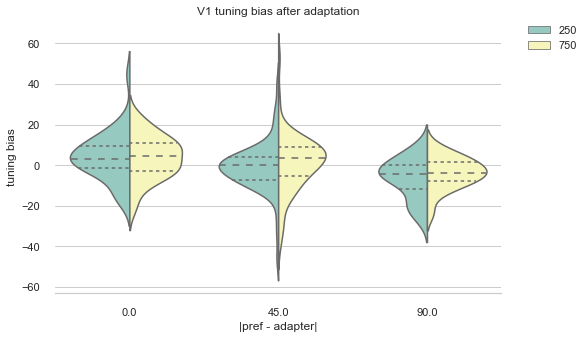

In [189]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_tune[df_adp_tune.area == 'V1'], 
                    x="ori_pref_bin", y="tuning_bias", hue="isi", 
                    split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'V1 tuning bias after adaptation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

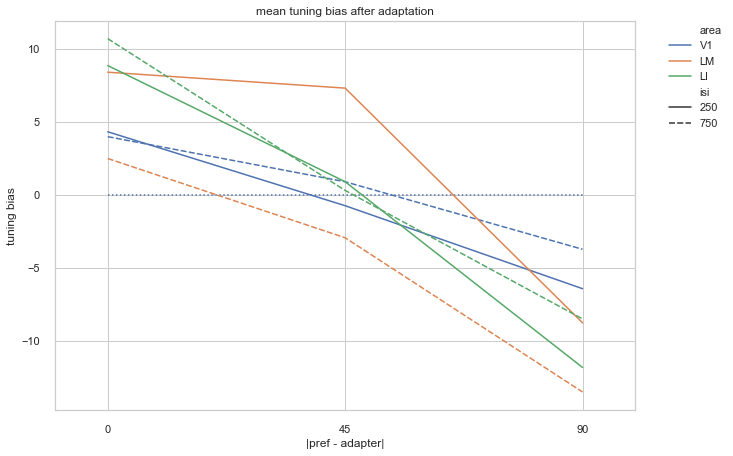

In [190]:
tt = df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).mean().reset_index()

ax = sns.lineplot(data=tt, x="ori_pref_bin", y="tuning_bias", hue="area", style="isi", ci='sd');
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'mean tuning bias after adaptation')
plt.xlim([-10,100]); plt.xticks([0,45,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.hlines(0, 0, 90, linestyles='dotted');

In [213]:
# bias_mean = df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).mean().reset_index().to_numpy()[:,-1]

# bias_sem = df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).std().reset_index().to_numpy()[:,-1] / np.sqrt(df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).count().reset_index().to_numpy()[:,-1].astype(float))

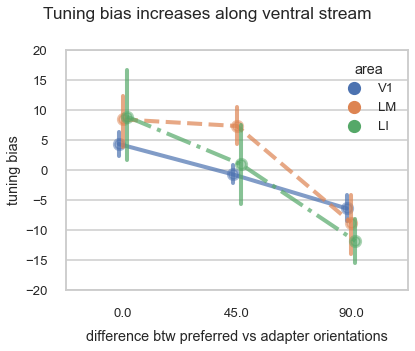

In [210]:
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale = 0.8)

fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
ax = sns.pointplot(ax=axes, x="ori_pref_bin", y="tuning_bias", hue="area", 
                   data=df_adp_tune[df_adp_tune.isi==250], ci=68, dodge=True,
                   linestyles=["-", "--", "dashdot"])
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
plt.ylim(-20,20)
plt.xlabel('difference btw preferred vs adapter orientations', labelpad=10)
plt.ylabel('tuning bias');

figtitle = 'Tuning bias increases along ventral stream'
fig.suptitle(figtitle)
plt.tight_layout()
# plt.savefig(root_path + 'results/poster/' + figtitle + '.pdf', format='pdf')

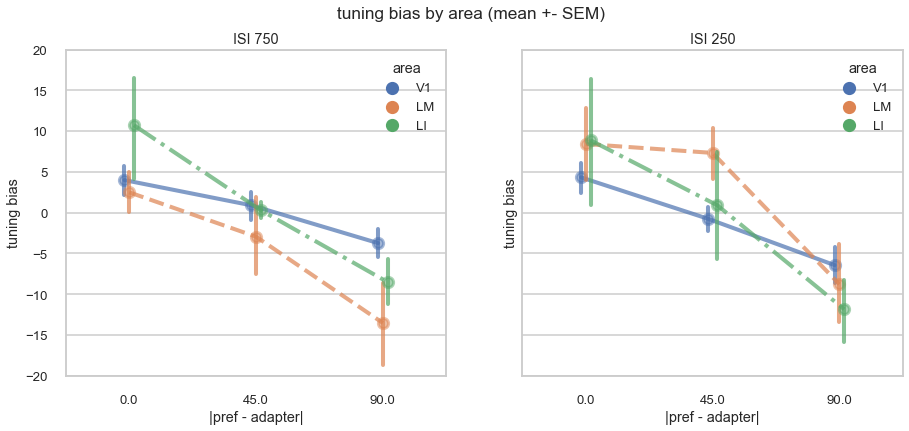

In [192]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('tuning bias by area (mean +- SEM)')

ax = sns.pointplot(ax=axes[0], x="ori_pref_bin", y="tuning_bias", hue="area", 
                   data=df_adp_tune[df_adp_tune.isi==750], ci=68, dodge=True, 
                   linestyles=["-", "--", "dashdot"])
# confidence interval 68% is SEM, assuming Gaussian - https://github.com/mwaskom/seaborn/issues/1427

plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
plt.ylim(-20,20)
axes[0].set_title('ISI 750');
axes[0].set(xlabel = '|pref - adapter|', ylabel = 'tuning bias');

ax = sns.pointplot(ax=axes[1], x="ori_pref_bin", y="tuning_bias", hue="area", 
                   data=df_adp_tune[df_adp_tune.isi==250], ci=68, dodge=True,
                   linestyles=["-", "--", "dashdot"])
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
axes[1].set_title('ISI 250');
axes[1].set(xlabel = '|pref - adapter|', ylabel = 'tuning bias');

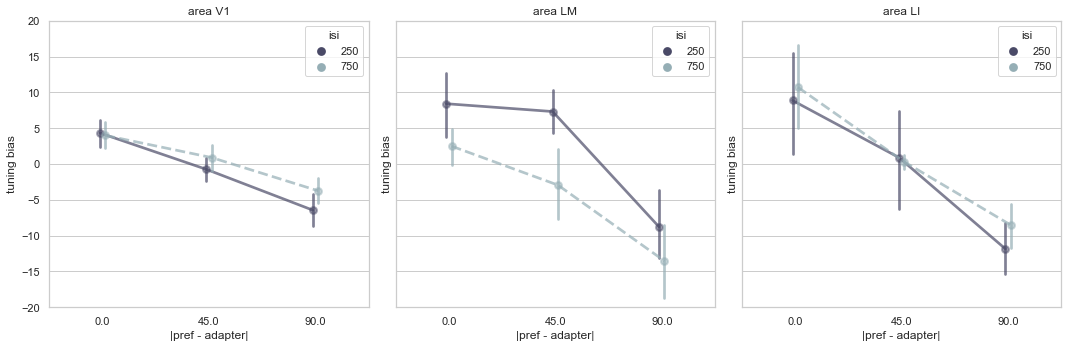

In [304]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# fig.suptitle('mean tuning bias by area')

ax = sns.pointplot(ax=axes[0], x="ori_pref_bin", y="tuning_bias", hue="isi", 
                   data=df_adp_tune[df_adp_tune.area=="V1"], ci=68, dodge=True,
                   palette="bone", linestyles=["-", "--"])
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
plt.ylim(-20,20)
axes[0].set_title('area V1');
axes[0].set(xlabel = '|pref - adapter|', ylabel = 'tuning bias');

ax = sns.pointplot(ax=axes[1], x="ori_pref_bin", y="tuning_bias", hue="isi", 
                   data=df_adp_tune[df_adp_tune.area=="LM"], ci=68, dodge=True,
                   palette="bone", linestyles=["-", "--"])
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
axes[1].set_title('area LM');
axes[1].set(xlabel = '|pref - adapter|', ylabel = 'tuning bias');

ax = sns.pointplot(ax=axes[2], x="ori_pref_bin", y="tuning_bias", hue="isi", 
                   data=df_adp_tune[df_adp_tune.area=="LI"], ci=68, dodge=True,
                   palette="bone", linestyles=["-", "--"])
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.7);
axes[2].set_title('area LI');
axes[2].set(xlabel = '|pref - adapter|', ylabel = 'tuning bias');

plt.tight_layout()
plt.show()

### test threshold stability

In [46]:
df_thresh = df[['area','vis','vis_well_fit']].copy()
df_thresh['re_vis_well_fit'] = ((df3.R2 > 0.8) & (df3.OSI > 0.2) & (df3.OSI < 1.5) & (df3.vis == 1)).astype(int)

df_thresh['agree'] = (df_thresh.re_vis_well_fit == df_thresh.vis_well_fit).astype(int)
df_thresh['overlap'] = ((df_thresh.re_vis_well_fit) & (df_thresh.vis_well_fit)).astype(int)

t1 = df_thresh[['area','re_vis_well_fit','vis_well_fit','overlap','agree']].groupby('area', sort=False).mean().reset_index().values
t2 = df_thresh[['area','re_vis_well_fit','vis_well_fit','overlap','agree']].groupby('area', sort=False).count().reset_index().values
tt = (t1[:,1:] * t2[:,1:]).astype(int)

df5 = pd.DataFrame(tt); 
df5.columns = ['re_vis_well_fit', 'vis_well_fit', 'overlap', 'agree']; df5.index = ['V1', 'LM', 'LI']
df5['total'] = t2[:,1].astype(int)
df5['contain_old'] = df5.overlap / df5.vis_well_fit
df5['new_percent'] = df5.re_vis_well_fit / df5.total
df5

,re_vis_well_fit,vis_well_fit,overlap,agree,total,contain_old,new_percent
V1,128,118,106,259,293,0.898305,0.436860
LM,45,26,24,137,160,0.923077,0.281250
LI,17,6,6,75,86,1.000000,0.197674


In [ ]:
# plot_adp_pipeline

def f(win):
    plt.figure(figsize=(15,5))
    plt.plot(df1.dfof_ad, df1['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
    plt.plot(df2.dfof_ad, df2['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
    plt.legend(['isi = 750', 'isi = 250'])
    plt.xlim([0,0.1])
    plt.xlabel('dfof_ad')
    plt.ylabel('adaptation mag rolling mean')
    plt.title('adp mag rolling mean change with dfof_ad of cells')
    plt.show()

interactive_plot = interactive(f, win=(2, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

## estimate required grating nset

In [96]:
file_path = os.path.join(root_path, "mat", "adp_dataset_master.xlsx").replace("\\","/")
meta_full = pd.read_excel(file_path, index_col=None)
meta_grating = meta_full[meta_full.paradigm == 'grating']
meta_grating['area'].value_counts(sort = False)

V1    10
LM    10
LI     9
Name: area, dtype: int64

In [111]:
frame = {'total': df5.total.astype(float) / [3,3,2] * meta_grating['area'].value_counts(sort = False),
         're_well_fit': df5.re_vis_well_fit.astype(float) / [3,3,2] * meta_grating['area'].value_counts(sort = False), 
         'total_per_set': df5.total.astype(float) / [3,3,2], 
         're_well_fit_per_set': df5.re_vis_well_fit.astype(float) / [3,3,2]}
df6 = pd.DataFrame(frame)
df6.applymap('{:,.2f}'.format)

,total,re_well_fit,total_per_set,re_well_fit_per_set
V1,976.67,426.67,97.67,42.67
LM,533.33,150.00,53.33,15.00
LI,387.00,76.50,43.00,8.50


In [1]:
(426-150) / 15, (426-76) / 9
# to achieve the errorbar of V1, need 18 more LM dataset & 39 more LI dataset
# but we dont need that high accuracy. lets see the errorbar if we have 12 more for each HVA

(18.4, 38.888888888888886)